## Importing required modules into our notebook

In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Functions to create Multi Layer Architecture and initialise weights

In [2]:
def init(inp,out):
    return np.random.randn(inp,out)/np.sqrt(inp)
def create_arch(input_layer,first_layer,output_layer,random_seed=0):
    np.random.seed(random_seed)
    layers=X.shape[1],3,1
    arch=list(zip(layers[:-1],layers[1:]))
    weights=[init(inp,out) for inp,out in arch]
    return weights

## Activation Functions

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def sigmoid_prime(s):
    return s*(1-s)

## Function to implement Feed Forward processing in a Network

In [4]:
def feed_forward(X,weights):
    a=X.copy()
    out=list()
    for w in weights:
        z=np.dot(a,w)
        a=sigmoid(z)
        out.append(a)
    return out

## Accuracy check

In [5]:
def accuracy(true_label,predicted):
    correct_preds=np.ravel(predicted)==true_label
    return np.sum(correct_preds)/len(true_label)

## Back Propagation function to calculate error in the network

In [6]:
def backpropagation(l1,l2,weights,y):
    l2_error=y.reshape(-1,1)-l2
    l2_delta=l2_error*sigmoid_prime(l2)
    l1_error=l2_delta.dot(weights[1].T)
    l1_delta=l1_error*sigmoid_prime(l1)
    return l2_error,l1_delta,l2_delta

## Update the weights accordingly

In [7]:
def update_weights(X,l1,l1_delta,l2_delta,weights,alpha=1.0):
    weights[1]+=(alpha*l1.T.dot(l2_delta))
    weights[0]+=(alpha*X.T.dot(l1_delta))
    return weights

## Prediction using trained weights

In [8]:
def predict(X,weights):
    _,l2=feed_forward(X,weights)
    preds=np.ravel((l2>0.5).astype(int))
    return preds

## Data collection, Splitting and Data Visualization

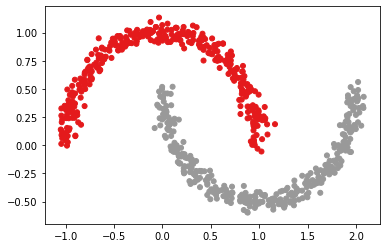

In [9]:
np.random.seed(0)
coord,cl=make_moons(1000,noise=0.05)
X,Xt,y,yt=train_test_split(coord,cl,test_size=0.3,random_state=0)
plt.scatter(X[:,0],X[:,1],s=25,c=y,cmap=plt.cm.Set1)
plt.show()

## Creating a Network, Training it on our Moons Data, Testing the model

In [10]:
weights=create_arch(X,3,1)
for j in range(30000+1):
    l1,l2=feed_forward(X,weights)
    l2_error,l1_delta,l2_delta=backpropagation(l1,l2,weights,y)
    weights=update_weights(X,l1,l1_delta,l2_delta,weights,alpha=0.05)
    if(j%5000==0):
        train_error=np.mean(np.abs(l2_error))
        print("epoch {:5} ".format(j),end='-')
        print(' error:{:0.4f} '.format(train_error),end='-')
        train_accuracy=accuracy(true_label=y,predicted=(l2>0.5))
        test_preds=predict(Xt,weights)
        test_accuracy=accuracy(true_label=yt,predicted=test_preds)
        print(" acc:train {:0.3f} ".format(train_accuracy),end="|")
        print(" test {:0.3f} ".format(test_accuracy))

epoch     0 - error:0.5020 - acc:train 0.493 | test 0.483 
epoch  5000 - error:0.0872 - acc:train 0.954 | test 0.947 
epoch 10000 - error:0.0712 - acc:train 0.951 | test 0.927 
epoch 15000 - error:0.0862 - acc:train 0.921 | test 0.923 
epoch 20000 - error:0.1153 - acc:train 0.894 | test 0.820 
epoch 25000 - error:0.0664 - acc:train 0.960 | test 0.950 
epoch 30000 - error:0.0615 - acc:train 0.963 | test 0.950 
